---

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Estatística Descritiva: Analise de Outliers</b></font></h1>

---

## **Base de dados para Exemplificar**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tuliofor/dados_aula/main/kc_house_data.csv')
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


# Analise de Outliers (dados que fogem do padrão)

> A análise de outliers é uma etapa crucial na análise exploratória de dados (EDA), pois permite identificar valores que estão muito distantes da maioria dos outros dados em um conjunto. Esses valores podem indicar erros de medição, entradas incorretas ou fenômenos genuínos que merecem atenção especial.


### **O que são Outliers?**

Outliers são pontos de dados que se diferenciam significativamente dos demais pontos. Eles podem ser causados por:
- **Erros de Medição:** Exemplo: Um sensor que registra erroneamente uma temperatura de 500°C em um ambiente que normalmente varia entre 20°C e 30°C.
- **Erro Humano:** Exemplo: Inserção incorreta de um valor monetário onde uma vírgula foi colocada no lugar errado.
- **Fenômenos Raros:** Exemplo: Um atleta que corre 100 metros em um tempo muito mais rápido que a média dos outros competidores.

### **Importância da Análise de Outliers**

1. **Identificação de Erros:** Detectar erros de medição ou entrada de dados incorretos que devem ser corrigidos ou removidos antes de realizar análises mais aprofundadas.
2. **Melhoria da Precisão:** Remover outliers pode melhorar a precisão dos modelos estatísticos ou de machine learning.
3. **Descoberta de Novos Fenômenos:** Às vezes, outliers revelam novos insights ou fenômenos que podem ser interessantes para investigação.


### **Métodos Comuns para Análise de Outliers**



#### **1. Boxplot**
Como mencionado anteriormente, um boxplot é uma excelente ferramenta para visualizar outliers. Valores que se encontram fora dos "bigodes" do boxplot são considerados outliers.

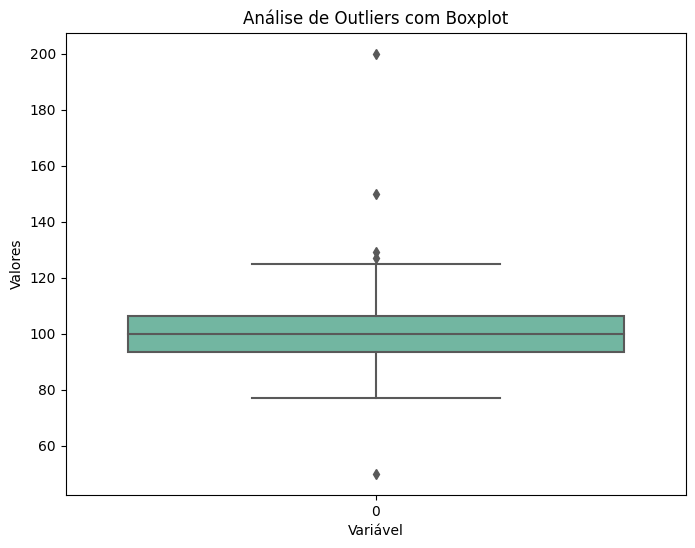

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dados fictícios com outliers
data = np.append(np.random.normal(100, 10, 200), [50, 150, 200])

# Criando o Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, palette="Set2")

# Configurações adicionais
plt.title('Análise de Outliers com Boxplot')
plt.xlabel('Variável')
plt.ylabel('Valores')

# Exibir o gráfico
plt.show()


#### **2. Z-Score**
O Z-Score mede a **distância de um valor em relação à média**, em termos de desvios padrão. Valores com Z-Score muito alto ou muito baixo são considerados outliers.


In [4]:
from scipy import stats
import numpy as np

# Dados fictícios
data = np.random.normal(100, 10, 1000)

# Calculando o Z-Score
z_scores = np.abs(stats.zscore(data))

# Identificando os outliers
outliers = data[z_scores > 3]
print(f"Outliers identificados: {outliers}")

Outliers identificados: [135.85647183 131.42484601]


#### **3. Análise de Dispersão**
Gráficos de dispersão são úteis para visualizar outliers quando se está analisando a relação entre duas variáveis.


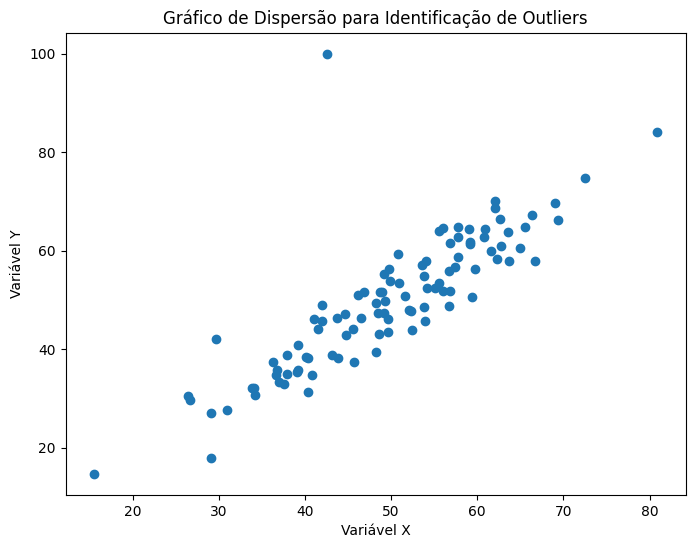

In [5]:
import matplotlib.pyplot as plt

# Dados fictícios
x = np.random.normal(50, 10, 100)
y = x + np.random.normal(0, 5, 100)
y[5] = 100  # Introduzindo um outlier intencional

# Criando o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Gráfico de Dispersão para Identificação de Outliers')
plt.xlabel('Variável X')
plt.ylabel('Variável Y')

# Exibir o gráfico
plt.show()

#### **4. Análise de Percentis**
Comparar dados com percentis pode ajudar a identificar valores que estão muito além dos limites esperados, como acima do 95º percentil ou abaixo do 5º percentil.

In [6]:
# Calculando percentis
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

# Definindo limites para outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identificando outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]
print(f"Outliers identificados: {outliers}")

Outliers identificados: [135.85647183 131.42484601  72.97547694]


# Tratamento de Outliers

> O tratamento de outliers é uma etapa importante na análise de dados que pode impactar significativamente os resultados e a qualidade das análises. O objetivo é lidar com outliers de maneira que eles não distorçam a análise e os resultados dos modelos.



### **1. Remoção de Outliers**

A remoção de outliers pode ser feita quando eles são identificados como erros ou se a análise mostra que sua presença é indesejada.


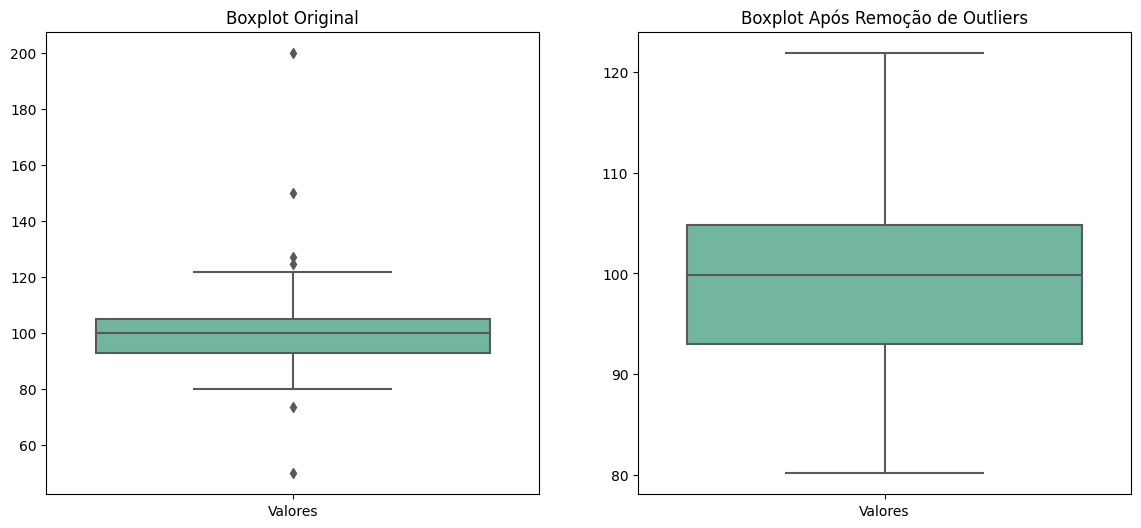

In [7]:
# @title Exemplo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gerando dados fictícios
np.random.seed(42)
data = np.append(np.random.normal(100, 10, 200), [50, 150, 200])

# Criando um DataFrame
df = pd.DataFrame(data, columns=['Valores'])

# Calculando o IQR
Q1 = df['Valores'].quantile(0.25)
Q3 = df['Valores'].quantile(0.75)
IQR = Q3 - Q1

# Definindo limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removendo outliers
df_clean = df[(df['Valores'] >= lower_bound) & (df['Valores'] <= upper_bound)]

# Plotando os dados antes e depois da remoção
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, palette="Set2")
plt.title('Boxplot Original')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, palette="Set2")
plt.title('Boxplot Após Remoção de Outliers')

plt.show()

### **2. Transformação de Dados**

Transformar dados pode reduzir o impacto dos outliers e torná-los mais conformes com a distribuição normal.


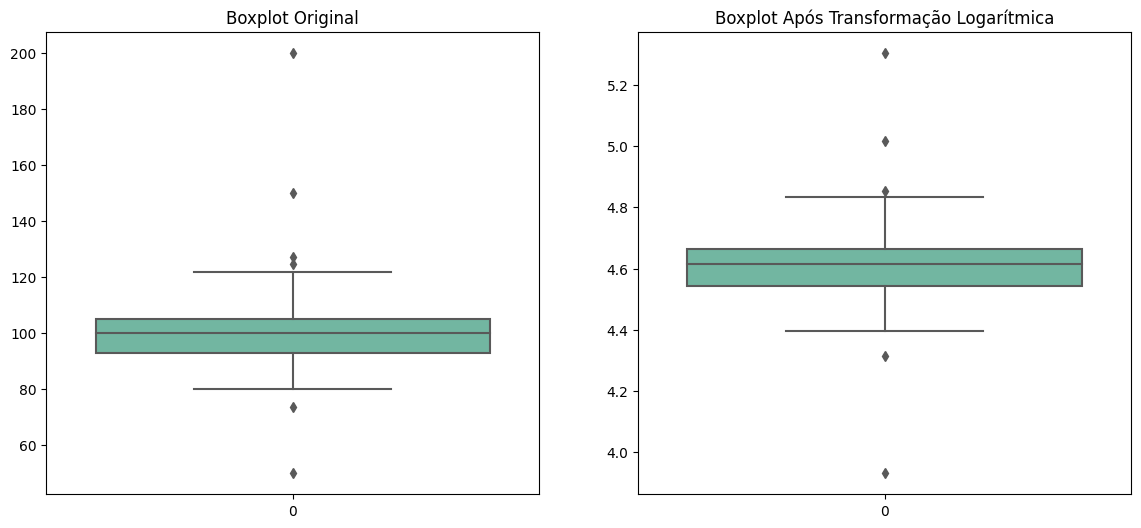

In [8]:
# @title exemplo

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gerando dados fictícios
np.random.seed(42)
data = np.append(np.random.normal(100, 10, 200), [50, 150, 200])

# Criando um DataFrame
df = pd.DataFrame(data, columns=['Valores'])

# Aplicando transformação logarítmica
df['Valores_Log'] = np.log(df['Valores'] + 1)  # Adiciona 1 para evitar log(0)

# Plotando os dados originais e transformados
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df['Valores'], palette="Set2")
plt.title('Boxplot Original')

plt.subplot(1, 2, 2)
sns.boxplot(data=df['Valores_Log'], palette="Set2")
plt.title('Boxplot Após Transformação Logarítmica')

plt.show()


### **3. Imputação de Outliers**

Em alguns casos, pode ser apropriado substituir outliers por valores mais típicos ou medianos.


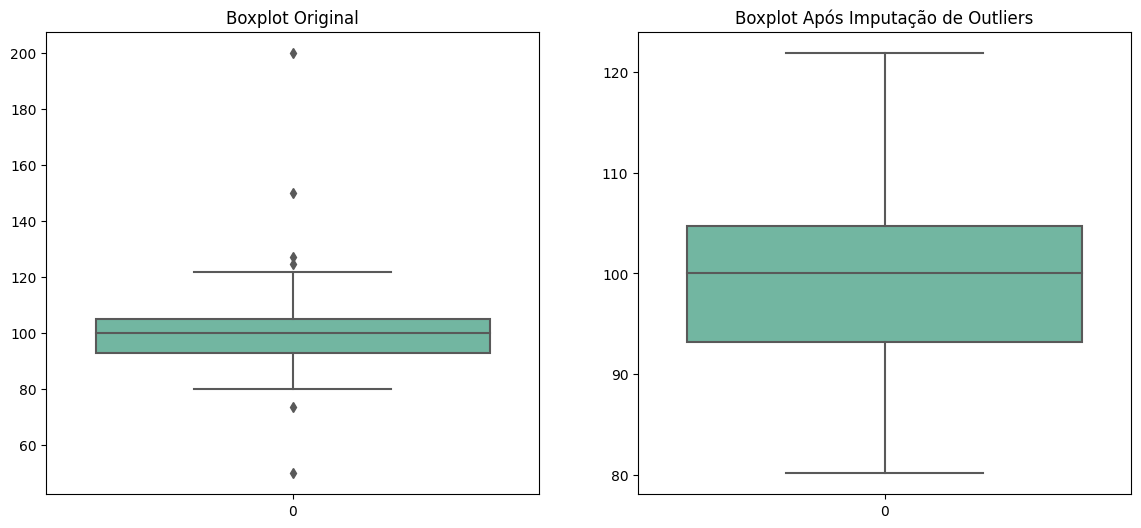

In [9]:
# @title exemplo com a mediana
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gerando dados fictícios
np.random.seed(42)
data = np.append(np.random.normal(100, 10, 200), [50, 150, 200])

# Criando um DataFrame
df = pd.DataFrame(data, columns=['Valores'])

# Calculando o IQR
Q1 = df['Valores'].quantile(0.25)
Q3 = df['Valores'].quantile(0.75)
IQR = Q3 - Q1

# Definindo limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Imputando outliers com a mediana
median = df['Valores'].median()
df['Valores_Imputados'] = np.where((df['Valores'] < lower_bound) | (df['Valores'] > upper_bound), median, df['Valores'])

# Plotando os dados originais e imputados
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df['Valores'], palette="Set2")
plt.title('Boxplot Original')

plt.subplot(1, 2, 2)
sns.boxplot(data=df['Valores_Imputados'], palette="Set2")
plt.title('Boxplot Após Imputação de Outliers')

plt.show()

### **4. Normalização dos Dados**

Normalizar os dados pode reduzir o impacto dos outliers, especialmente quando se usa técnicas como a normalização Min-Max.


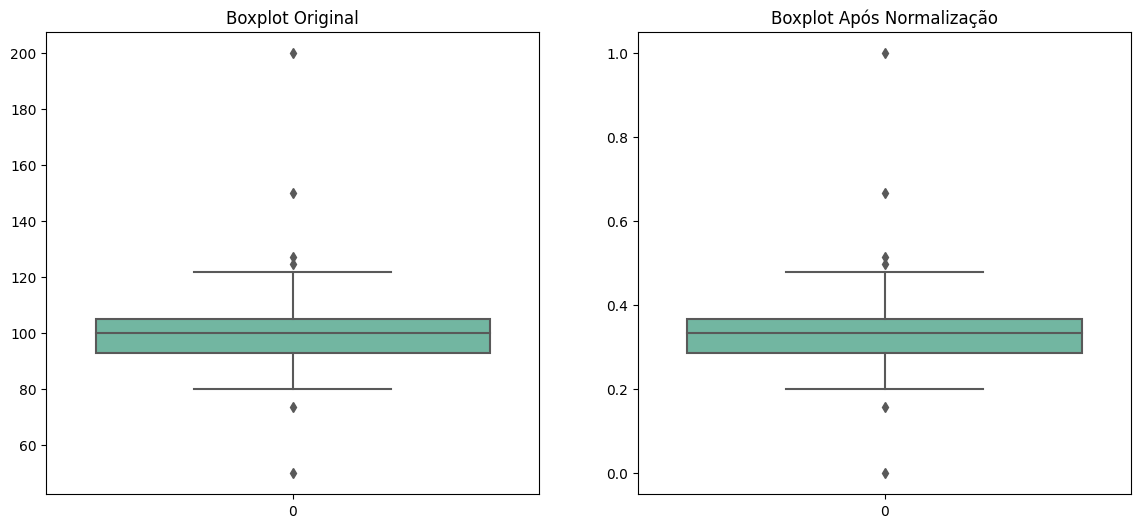

In [10]:
# @title Exemplo: Normalização Min-Max

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Gerando dados fictícios
np.random.seed(42)
data = np.append(np.random.normal(100, 10, 200), [50, 150, 200])

# Criando um DataFrame
df = pd.DataFrame(data, columns=['Valores'])

# Normalizando os dados
scaler = MinMaxScaler()
df['Valores_Normalizados'] = scaler.fit_transform(df[['Valores']])

# Plotando os dados originais e normalizados
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df['Valores'], palette="Set2")
plt.title('Boxplot Original')

plt.subplot(1, 2, 2)
sns.boxplot(data=df['Valores_Normalizados'], palette="Set2")
plt.title('Boxplot Após Normalização')

plt.show()

### **Exemplos Práticos de Utilização**

#### **1. Detecção de Fraudes Financeiras**
**Contexto:** Em transações bancárias, outliers podem indicar atividades fraudulentas, como uma retirada muito grande ou uma transação em um local incomum.

- **Aplicação:** Analisar a distribuição das transações para identificar operações que estão muito acima ou abaixo dos valores normais pode ajudar a detectar fraudes.

#### **2. Qualidade de Produção**
**Contexto:** Em uma linha de produção, valores de medição de produtos que são muito diferentes do esperado podem indicar problemas no processo de fabricação.

- **Aplicação:** Usar boxplots para monitorar a qualidade da produção e detectar lotes defeituosos ou máquinas com problemas.

#### **3. Pesquisa de Mercado**
**Contexto:** Na análise de pesquisas de mercado, respostas muito diferentes do padrão podem indicar participantes que não responderam com seriedade.

- **Aplicação:** Remover outliers antes de realizar análises de segmentação de mercado para melhorar a precisão das conclusões.

## **BOXPLOT**

> Um **Boxplot** (ou diagrama de caixa) é uma representação gráfica que mostra a distribuição de um conjunto de dados numéricos baseado em um resumo estatístico. Ele destaca a mediana, os quartis e os outliers, proporcionando uma maneira visual de entender a variabilidade dos dados e identificar valores atípicos.




<br>
<img src="https://fernandafperes.com.br/blog/interpretacao-boxplot/g2.png " width=600, align="centre">
<br>

[link: imagem]("https://fernandafperes.com.br/blog/interpretacao-boxplot/g2.png")


### **Elementos de um Boxplot:**

1. **Mediana:** A linha dentro da caixa, representando o valor central dos dados.
2. **Quartis:**
   - **Primeiro Quartil (Q1):** O valor que divide os 25% inferiores dos dados.
   - **Terceiro Quartil (Q3):** O valor que divide os 25% superiores dos dados.
3. **Intervalo Interquartil (IQR):** A diferença entre Q3 e Q1, representando a dispersão central dos dados.
4. **Limites (ou "bigodes"):** Extensão do menor e maior valor dentro de 1.5 vezes o IQR a partir dos quartis.
5. **Outliers:** Pontos fora dos limites, considerados valores atípicos.



### **Exemplo de Boxplot no Google Colab**

Aqui está um exemplo de como criar um Boxplot no Google Colab usando a biblioteca `matplotlib` e `seaborn`.


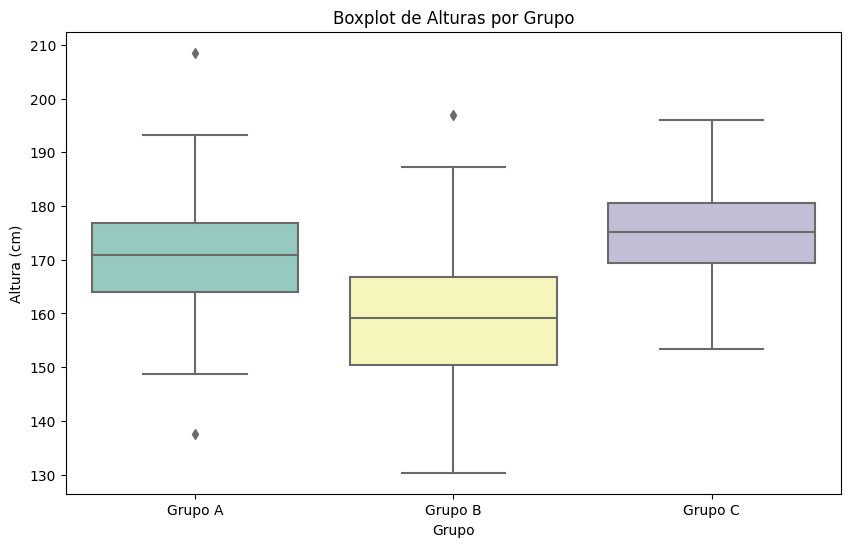

In [11]:

#### **Passo 1: Importar as Bibliotecas Necessárias**

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#### **Passo 2: Criar um Conjunto de Dados de Exemplo**


# Dados fictícios de alturas (em cm) de diferentes grupos
grupo_A = np.random.normal(170, 10, 200)
grupo_B = np.random.normal(160, 12, 200)
grupo_C = np.random.normal(175, 8, 200)


#### **Passo 3: Criar o Boxplot**

# Criando o Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[grupo_A, grupo_B, grupo_C], palette="Set3")

'''
- **`sns.boxplot`:** Esta função cria o boxplot para os dados fornecidos.
- **`palette="Set3"`:** Define a paleta de cores para o gráfico.
- **`plt.xticks`:** Nomeia os grupos no eixo X.
- **`plt.title`, `plt.xlabel`, `plt.ylabel`:** Configurações de títulos e rótulos dos eixos.
'''


# Configurações adicionais
plt.title('Boxplot de Alturas por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Altura (cm)')
plt.xticks([0, 1, 2], ['Grupo A', 'Grupo B', 'Grupo C'])

# Exibir o gráfico
plt.show()


## Exemplos praticos Boxplot


### **1. Análise de Desempenho Acadêmico**

**Contexto:** Suponha que você esteja analisando as notas dos alunos em três diferentes disciplinas (Matemática, Física e Química).

- **Aplicação do Boxplot:** Criar um boxplot para cada disciplina ajuda a visualizar a distribuição das notas, identificar se há uma disciplina onde os alunos consistentemente têm notas mais baixas ou mais altas, e detectar outliers (como alunos que obtiveram notas extremamente altas ou baixas).



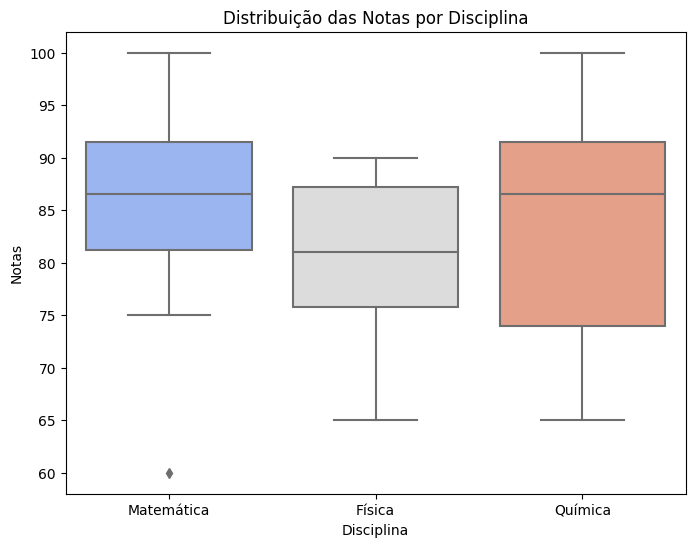

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados fictícios de notas
matematica = [75, 80, 85, 90, 95, 100, 60, 85, 88, 92]
fisica = [70, 78, 82, 85, 88, 90, 65, 75, 80, 89]
quimica = [65, 70, 72, 80, 85, 88, 95, 90, 92, 100]

# Criando o Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=[matematica, fisica, quimica], palette="coolwarm")

# Configurações adicionais
plt.title('Distribuição das Notas por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Notas')
plt.xticks([0, 1, 2], ['Matemática', 'Física', 'Química'])

# Exibir o gráfico
plt.show()


### **2. Comparação de Salários em Diferentes Departamentos**

**Contexto:** Uma empresa quer comparar os salários de diferentes departamentos (por exemplo, TI, RH, Marketing).

- **Aplicação do Boxplot:** Um boxplot pode ser utilizado para comparar a distribuição salarial em cada departamento, ajudar a visualizar a dispersão dos salários e identificar se há diferenças significativas entre os departamentos.



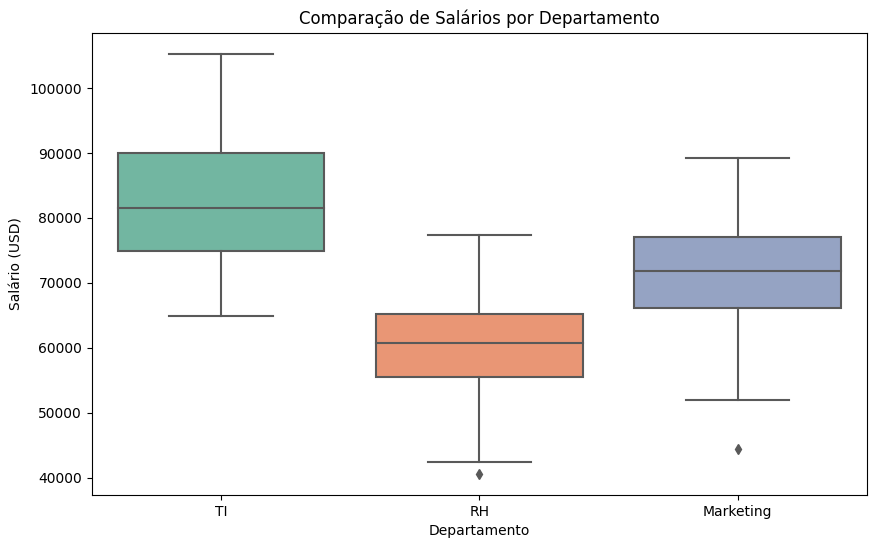

In [13]:
import numpy as np

# Dados fictícios de salários em dólares
ti = np.random.normal(80000, 10000, 100)
rh = np.random.normal(60000, 8000, 100)
marketing = np.random.normal(70000, 9000, 100)

# Criando o Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[ti, rh, marketing], palette="Set2")

# Configurações adicionais
plt.title('Comparação de Salários por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Salário (USD)')
plt.xticks([0, 1, 2], ['TI', 'RH', 'Marketing'])

# Exibir o gráfico
plt.show()


### **3. Avaliação da Qualidade de Produção**

**Contexto:** Uma fábrica deseja analisar a variação no peso de produtos fabricados em diferentes lotes.

- **Aplicação do Boxplot:** Com um boxplot, a empresa pode visualizar a distribuição dos pesos em diferentes lotes, identificar lotes com maior variação de peso, e detectar se algum lote contém produtos que são significativamente mais pesados ou mais leves que os demais.


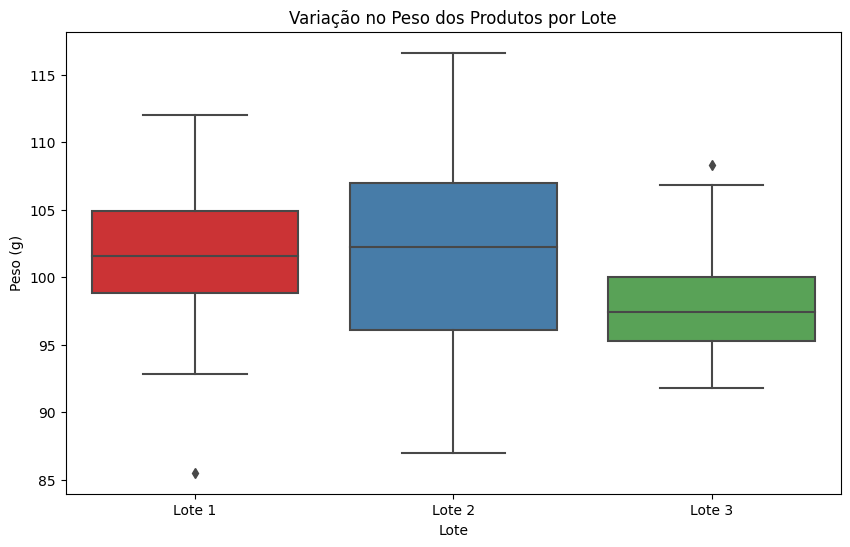

In [14]:
# Dados fictícios de peso de produtos em gramas
lote1 = np.random.normal(100, 5, 50)
lote2 = np.random.normal(102, 6, 50)
lote3 = np.random.normal(98, 4, 50)

# Criando o Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[lote1, lote2, lote3], palette="Set1")

# Configurações adicionais
plt.title('Variação no Peso dos Produtos por Lote')
plt.xlabel('Lote')
plt.ylabel('Peso (g)')
plt.xticks([0, 1, 2], ['Lote 1', 'Lote 2', 'Lote 3'])

# Exibir o gráfico
plt.show()

### **4. Análise de Dados de Pesquisa de Satisfação**

**Contexto:** Uma organização está analisando os dados de uma pesquisa de satisfação de clientes, onde as respostas são dadas em uma escala de 1 a 10.

- **Aplicação do Boxplot:** O boxplot pode ser usado para visualizar a distribuição das respostas dos clientes para diferentes aspectos do serviço (por exemplo, atendimento ao cliente, qualidade do produto, tempo de entrega).


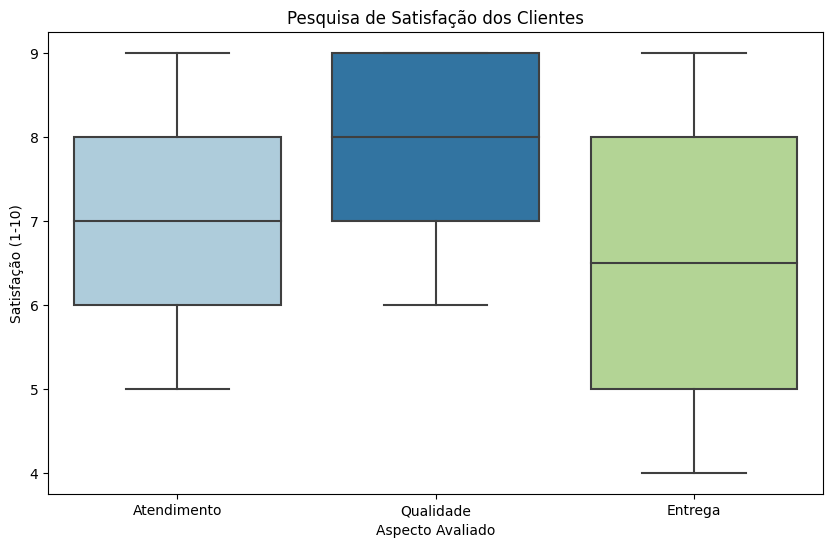

In [15]:
# Dados fictícios de satisfação
atendimento = np.random.randint(5, 10, 100)
qualidade = np.random.randint(6, 10, 100)
entrega = np.random.randint(4, 10, 100)

# Criando o Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[atendimento, qualidade, entrega], palette="Paired")

# Configurações adicionais
plt.title('Pesquisa de Satisfação dos Clientes')
plt.xlabel('Aspecto Avaliado')
plt.ylabel('Satisfação (1-10)')
plt.xticks([0, 1, 2], ['Atendimento', 'Qualidade', 'Entrega'])

# Exibir o gráfico
plt.show()

# **Covariância e Correlação**


**cov( )**

Em alguns momentos, queremos saber se duas variáveis possuem alguma relação entre si dentro de um conjunto de dados. Para estes casos, calculamos a covariância e a correlação.


A covariância é uma medida numérica que indica a inter-dependência entre duas variáveis. A covariância indica como duas variáveis se comportam conjuntamente em relação às suas médias.

- **Uma covariância igual a 0** indica que as duas variáveis são totalmente independentes;
- enquanto que uma covariância alta e positiva indica que uma variável é grande quando a outra é grande.

Analogamente, uma covariância negativa e com valor absoluto alto indica que uma variável é pequena quando a outra é grande.